In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#Data source: https://universe.roboflow.com/iotseecs/brain-tumor-yzzav/dataset/1

In [10]:
!pip install ultralytics
!pip install roboflow

In [12]:
!nvidia-smi

Thu Jan 29 18:14:43 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.105.08             Driver Version: 580.105.08     CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P0             26W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [13]:
from ultralytics import YOLO
from roboflow import Roboflow
rf = Roboflow(api_key="nXRFu1swQzbMlfRMolSH")
project = rf.workspace("mike-cox-szip2").project("brain-tumor-omjcy")
version = project.version(3)
dataset = version.download("yolov11")
                

loading Roboflow workspace...
loading Roboflow project...


#Yaml edit

In [15]:
#config
import yaml

yaml_path = "/kaggle/working/Brain-Tumor-3/data.yaml"   # or config.yml

with open(yaml_path, "r") as f:
    data = yaml.safe_load(f)

print(data)


data["path"] = "/kaggle/working/Brain-Tumor-3"

# optional but recommended
data["train"] = "/kaggle/working/Brain-Tumor-3/train/images"
data["val"] = "/kaggle/working/Brain-Tumor-3/valid/images"
data["test"]= "/kaggle/working/Brain-Tumor-3/test/images"

with open(yaml_path, "w") as f:
    yaml.dump(data, f, sort_keys=False)

print("YAML updated for Kaggle ✅")

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 5, 'names': ['Brain-With-Meningioma-Tumour', 'Brain-With-Pituitary-Tumour', 'Brain-With-Tumour', 'Healthy Brain', 'Tumor'], 'roboflow': {'workspace': 'mike-cox-szip2', 'project': 'brain-tumor-omjcy', 'version': 3, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/mike-cox-szip2/brain-tumor-omjcy/dataset/3'}}
YAML updated for Kaggle ✅


In [17]:
!cat /kaggle/working/Brain-Tumor-3/data.yaml

train: /kaggle/working/Brain-Tumor-3/train/images
val: /kaggle/working/Brain-Tumor-3/valid/images
test: /kaggle/working/Brain-Tumor-3/test/images
nc: 5
names:
- Brain-With-Meningioma-Tumour
- Brain-With-Pituitary-Tumour
- Brain-With-Tumour
- Healthy Brain
- Tumor
roboflow:
  workspace: mike-cox-szip2
  project: brain-tumor-omjcy
  version: 3
  license: CC BY 4.0
  url: https://universe.roboflow.com/mike-cox-szip2/brain-tumor-omjcy/dataset/3
path: /kaggle/working/Brain-Tumor-3


#Load and train the model

In [18]:
# Load a model
model = YOLO("yolo11n-seg.pt")

# Train the model
train_results = model.train(
    data="/kaggle/working/Brain-Tumor-3/data.yaml",  # path to dataset YAML
    epochs=10,  # number of training epochs
    imgsz=640,  # training image size
    device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu as  0 consider 1st GPU
)

New https://pypi.org/project/ultralytics/8.4.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Brain-Tumor-3/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0

#Graphs and visualization

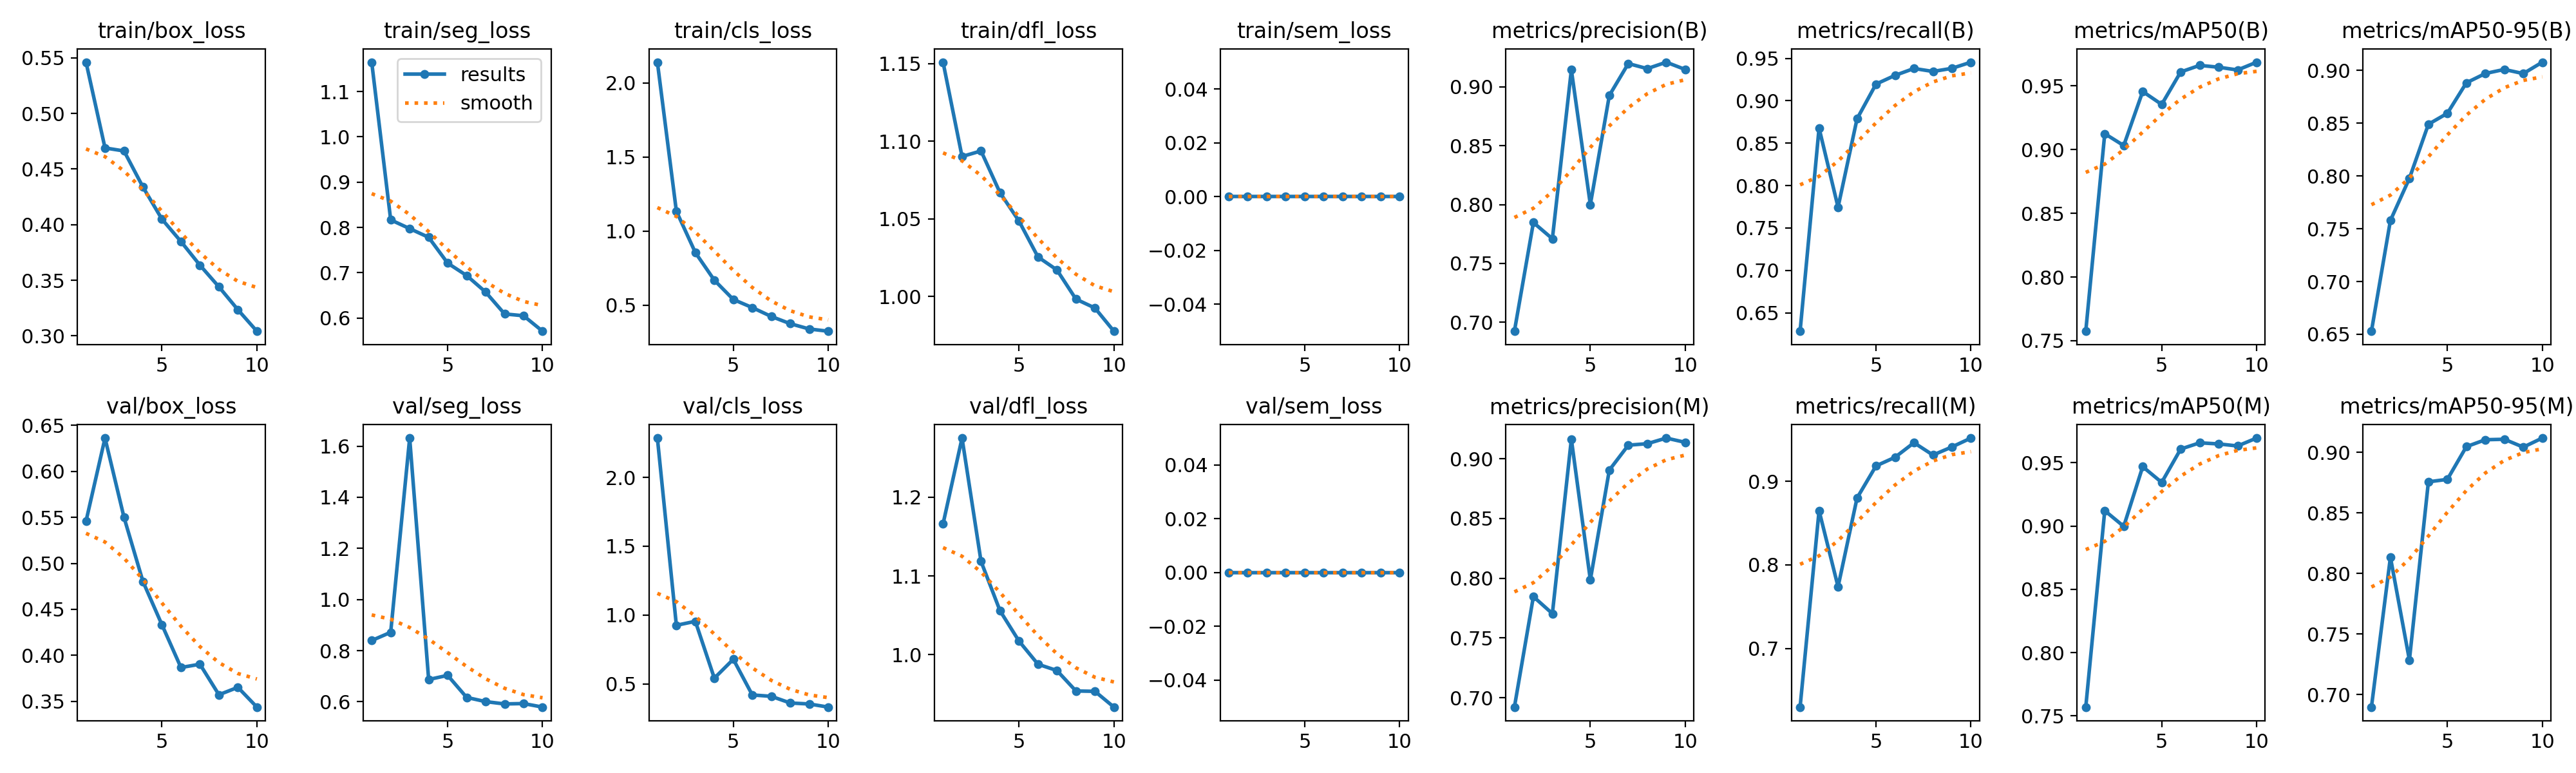

In [19]:
from IPython.display import Image

Image("/kaggle/working/runs/segment/train/results.png", width=600)


image 1/1 /kaggle/input/custom-test/1.jpg: 640x640 1 Brain-With-Meningioma-Tumour, 1 Healthy Brain, 1 Tumor, 9.4ms
Speed: 3.0ms preprocess, 9.4ms inference, 11.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /kaggle/working/runs/segment/predict


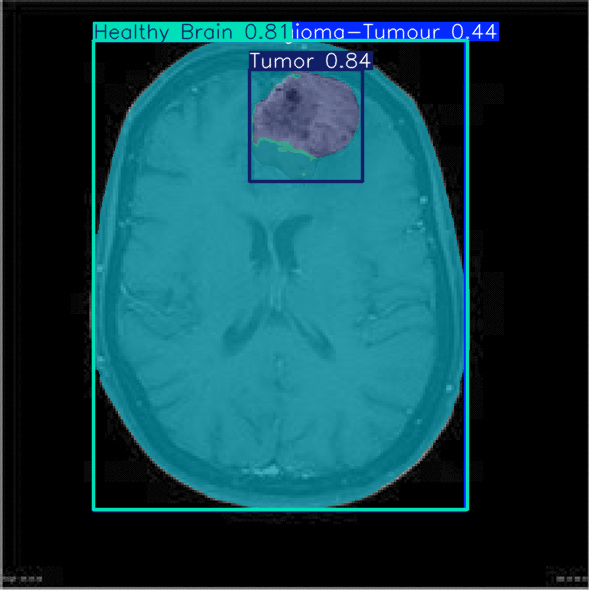

In [20]:
model = YOLO('/kaggle/working/runs/segment/train/weights/best.pt')
results = model("/kaggle/input/custom-test/1.jpg", save=True)
results[0].show()


image 1/1 /kaggle/input/custom-test/2.jpg: 640x576 1 Brain-With-Meningioma-Tumour, 1 Tumor, 62.6ms
Speed: 2.1ms preprocess, 62.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 576)
Results saved to /kaggle/working/runs/segment/predict2


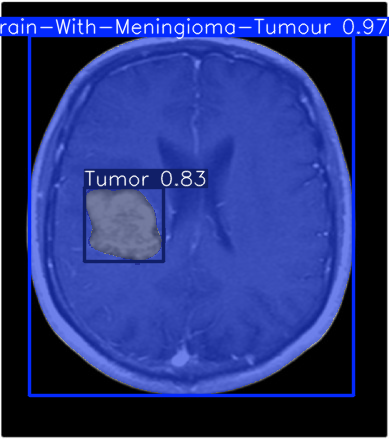

In [21]:
model = YOLO('/kaggle/working/runs/segment/train/weights/best.pt')
results = model("/kaggle/input/custom-test/2.jpg", save=True)
results[0].show()